In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv"
dataframe = pd.read_csv(url)
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
missing = dataframe.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
#substituindo os NaN pela mediana
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [ ]:
#normalizando os dados
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [ ]:
#Utilizando o Kmeans para predizer
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [ ]:
#validando a clusterização: varia de [-1,1]
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3644845919974304


In [ ]:
#validando a clusterização por davies bouldin: 
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0757138590613295


In [ ]:
#validando a clusterização por Calinski-Harabarsz
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.79374284143


In [16]:
#função para calcular a validação para cada método
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [17]:
#validação relativa
#chama a função com 3 clusters
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [18]:
#validação relativa
#chama a função com 5 clusters
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.34861955528487404 1.1527848335300397 3422.8431275922103


In [19]:
#validação relativa
#chama a função com 50 clusters
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.23792977010073632 1.2137762207331828 1620.6270919440396


In [20]:
#validando a estrutura dos clusters
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039179718712528 3.5027977733411326 302.2329111122864
0.34861955528487404 1.1527848335300397 3422.8431275922103


In [21]:
#validação da estabilidade dos clusters
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36871947128237154 1.0562346825020208 1204.1115110650273
0.35325029594762064 1.1428827695610746 1194.939766435848
0.36704188760608253 1.0984932613776763 1167.5309516804


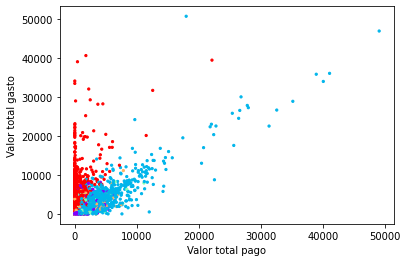

In [22]:
#as vezes é preciso executar duas vezes esse trecho para a imagem aparecer na tela
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

In [23]:
#é normal demorar bastante para executar o pairplot
#e se aparecer uma mensagem em vermelho do tipo "RuntimeWarning", pode ignorar e continue esperando que uma hora os gráficos vão aparecer :)
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

Output hidden; open in https://colab.research.google.com to view.

In [24]:
#descrição estatistica de cada cluster
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3278.0   443.992358   846.597972   0.000000    23.315538   
1        1540.0  1142.222657  1664.035755   0.000000   211.566656   
2         411.0  1987.501586  1854.459156  70.794108  1018.958891   
3        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
4        1072.0  1794.024195  1982.950586   0.000000   506.925348   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.992153   411.193793   9630.367575            3278.0  0.774417   
1         554.332740  1370.859355  19043.138560            1540.0  0.928053   
2        1337.287314  2138.678431  11670.179850             411.0  0.989486   
3        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
4        1087.920500  2308.762488  14581.459140            1072.0  0.862131   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.800040   4483.503862           3278.0  0.246549   
1        ...       524.184580  18621.013310           1540.0  0.278582   
2        ...      7112.618584  76406.207520            411.0  0.019318   
3        ...      1330.593643   8345.641905           2649.0  0.001799   
4        ...       884.718306  21235.065300           1072.0  0.117384   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346601  0.0  0.0  0.000000  0.444444  1.0  
1        0.367203  0.0  0.0  0.083333  0.545455  1.0  
2        0.090901  0.0  0.0  0.000000  0.000000  1.0  
3        0.023260  0.0  0.0  0.000000  0.000000  0.6  
4        0.186853  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [25]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.91386971e-02 2.30552524e-04 1.21267798e-01 4.80255998e-02
  7.33425496e-02 2.43607736e-02 1.72581896e-04 3.37097813e-05
  1.40021986e-04 7.93309218e-06 1.24113667e-04 2.86037895e-03
  9.43728649e-01 1.53557708e-01 5.68217245e-02 7.57977264e-05]
 [1.59699490e-01 2.45649360e-04 4.38116859e-01 2.56325660e-01
  1.81962376e-01 2.57889184e-02 2.04826443e-04 8.87914942e-05
  1.51162866e-04 9.36296056e-06 1.69350945e-04 6.17145756e-03
  6.04336246e-01 4.02584838e-01 8.54128174e-02 7.26645255e-05]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [2.

In [26]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [27]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.992358   629.345171    141.569301   5132.945933   814.477150   
1        1142.222657  3268.886929    183.019398   4097.701397  3037.241495   
2        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
3        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
4        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   

         n_clients  
cluster             
0             3278  
1             1540  
2              411  
3             2649  
4             1072  


<ipython-input-27-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [28]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3278.0,0.246549,0.346601,0.0,0.0,0.000000,0.444444,1.0
1,1540.0,0.278582,0.367203,0.0,0.0,0.083333,0.545455,1.0
2,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
3,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
4,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
